In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                     
warnings.filterwarnings("ignore")


In [7]:
import statsmodels.api as sm 

In [6]:
from patsy import dmatrices 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
dta = sm.datasets.fair.load_pandas().data

In [14]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [15]:
dta['affair'] = (dta.affairs > 0).astype(int)

Adding an column affair in which 1 represents having affairs, 0 represents not

In [18]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [23]:
dta.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
affair               int32
dtype: object

In [24]:
dta.shape

(6366, 10)

In [26]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [39]:
dta.drop(columns='affairs',inplace=True)

## Univariate analysis

<AxesSubplot:>

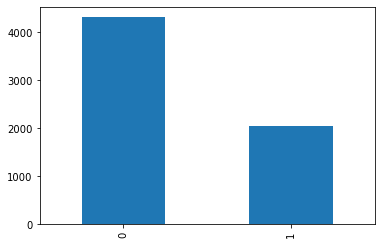

In [40]:
dta['affair'].value_counts().plot.bar()

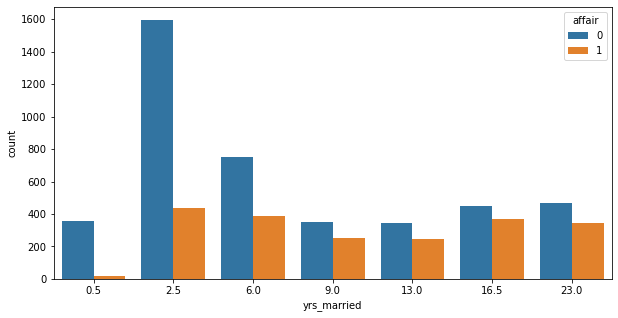

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='yrs_married',hue='affair', data=dta)
plt.show()

We can see that as the years of marriage increased the no. of women having an affair also increases

In [47]:
dta['yrs_married'].value_counts()

2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64

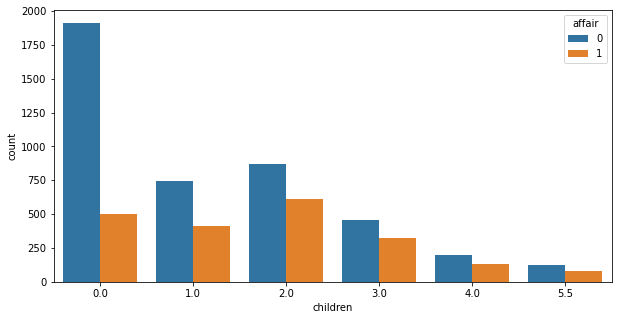

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='children',hue='affair', data=dta)
plt.show()

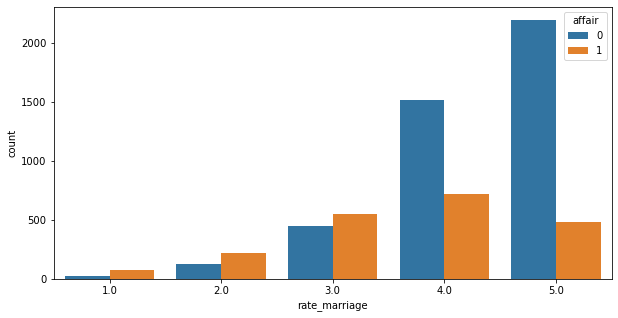

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='rate_marriage',hue='affair', data=dta)
plt.show()

In [45]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affair             0
dtype: int64

In [50]:
dta['occupation_husb'].value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

## Bivariate analysis

In [52]:
corr=dta.corr()

<AxesSubplot:>

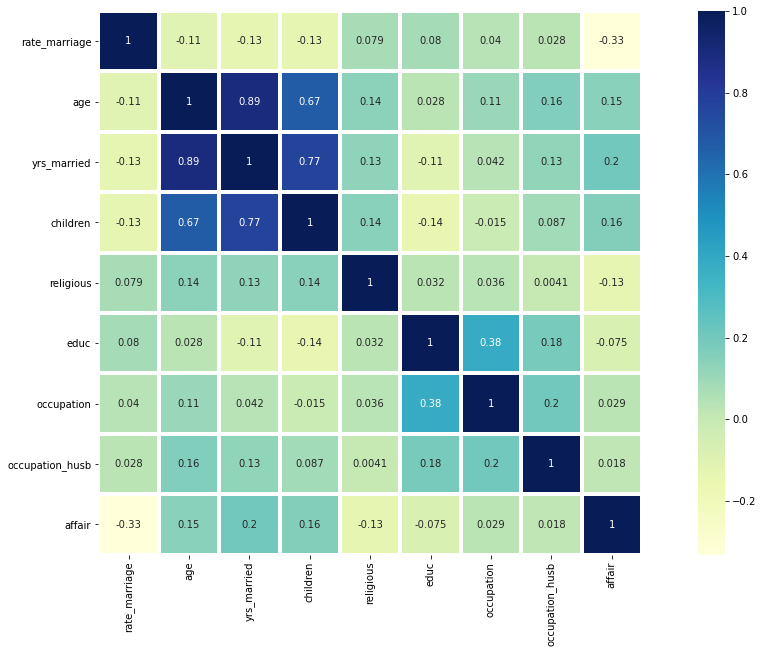

In [54]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, annot = True,fmt='.2g', linewidths=3, linecolor='white',cmap="YlGnBu",square=True )#mask=matrix)

From the heatmap we can conclude that the independent variable like yrs_married , no. of children and age are higly correlated with the target i.e. these factors are most likely to affect if a women has afair or not. 

## Data preparation

In [37]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")

In [55]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})



In [56]:
y = np.ravel(y)

In [57]:
X.shape

(6366, 17)

In [58]:
y.shape

(6366,)

## Logistic Regression

In [59]:
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7262016965127238

In [60]:
y.mean()

0.3224945020420987

## Model Evaluation Using a Validation Set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [62]:
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [63]:
probs = model2.predict_proba(X_test)
probs

array([[0.35336379, 0.64663621],
       [0.90304225, 0.09695775],
       [0.71187346, 0.28812654],
       ...,
       [0.53093497, 0.46906503],
       [0.82436407, 0.17563593],
       [0.74025122, 0.25974878]])

In [65]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7324607329842932
0.7459784226237514


In [66]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1171  132]
 [ 379  228]]
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      1303
         1.0       0.63      0.38      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.72      0.73      0.71      1910



In [67]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72370487, 0.69544741, 0.73469388, 0.70643642, 0.71585557,
        0.7299843 , 0.72955975, 0.70754717, 0.75      , 0.75314465]),
 0.7246374021306636)

In [68]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]]))

array([[0.7721879, 0.2278121]])